# Issue Report Analysis

Rename the filename below to your own location of the issue report and run the script using the >> button above

In [136]:
%matplotlib inline
import requests
filename = 'https://omnikit-lab.herokuapp.com/files/Loop-Report-2018-12-19-062628-0500.md'
test = requests.get(filename)
print(test.text)

edBasalRate: nil)
DoseEntry(type: LoopKit.DoseType.tempBasal, startDate: 2018-12-19 02:03:24 +0000, endDate: 2018-12-19 02:07:21 +0000, value: 0.0, unit: LoopKit.DoseUnit.units, description: nil, syncIdentifier: Optional("62706c6973743030d40102030405061f20582476657273696f6e58246f626a65637473592461726368697665725424746f7012000186a0a707081011151b1c55246e756c6cd2090a0b0f5a4e532e6f626a656374735624636c617373a30c0d0e80028003800580061001d2120a1314574e532e74696d652341c0e4ef3657a8a48004d2161718195a24636c6173736e616d655824636c6173736573564e5344617465a2181a584e534f626a656374230000000000000000d216171d1e574e534172726179a21d1a5f100f4e534b657965644172636869766572d1212254726f6f74800108111a232d32373f454a555c60626466686a6f77808287929ba2a5aeb7bcc4c7d9dce100000000000001010000000000000023000000000000000000000000000000e3"), scheduledBasalRate: Optional(1.7 IU/hr))
DoseEntry(type: LoopKit.DoseType.basal, startDate: 2018-12-19 02:07:21 +0000, endDate: 2018-12-19 02:07:26 +0000, value: 0.0, unit: LoopKit.DoseU

In [16]:
#! pip uninstall fileupload
#! pip install matplotlib

In [17]:
# import bqplot.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter
import re
import pandas as pd

## Load and parse file

In [18]:
commands = []
with open(filename, 'r') as input_file:
    xcode_log_text = input_file.read()
    regex = r"\* ([0-9-:\s]*)\s.*\s(send|receive)\s([a-z0-9]*)\n*"
    select_1a_commands = re.findall(regex, xcode_log_text, re.MULTILINE)
    for line in select_1a_commands:
        commands.append({"time": line[0], "type": line[1], "raw_value": line[2][12:]})

In [19]:
# Uncomment line below if you want to see the output of the parsed file to a dictonary:
# print(commands)

In [20]:
def select_extra_command(raw_value):
    if raw_value[:2]=='1a':
        if raw_value[32:34] not in ['16','17']:
            return 13
        else:
            return raw_value[32:34]

In [121]:
def generate_table(commands):
    df = pd.DataFrame(commands)
    df['time'] = pd.to_datetime(df['time'])
    df['command'] = df['raw_value'].str[:2].astype(str)
    df['extra_command'] = df['raw_value'].apply(select_extra_command).astype(str)
    df['time_delta'] = (df['time']-df['time'].shift()).fillna(0)
    return df

# All commands
With duration to next command

In [122]:
df = generate_table(commands)
pd.set_option('display.max_rows', None)
df

,raw_value,time,type,command,extra_command,time_delta
0,07041f061fbb808c,2019-02-08 21:37:28,send,07,None,00:00:00
1,011502080002080002020000ac0a0005d1eaa41f061fbb...,2019-02-08 21:37:29,receive,01,None,00:00:01
2,03131f061fbb140402081316250000ac0a0005d1ea82f4,2019-02-08 21:37:31,send,03,None,00:00:02
3,011b13881008340a5002080002080002030000ac0a0005...,2019-02-08 21:37:32,receive,01,None,00:00:01
4,190a43dc22f34c0000c801028101,2019-02-08 21:37:33,send,19,None,00:00:01
5,1d030000000000001fff03b2,2019-02-08 21:37:34,receive,1d,None,00:00:01
6,190ac6bcf472783700050802817a,2019-02-08 21:37:35,send,19,None,00:00:01
7,1d030000100000001fff8098,2019-02-08 21:37:36,receive,1d,None,00:00:01
8,1a0ebcfb011602010a0101a000340034170d0002080001...,2019-02-08 21:37:37,send,1a,17,00:00:01
9,1d440000203400001fff812a,2019-02-08 21:37:40,receive,1d,None,00:00:03


# Total send/received commands

In [123]:
df.groupby(['type']).size()

type
receive    334
send       334
dtype: int64

# Total commands by type

In [124]:
df.groupby(['type','command', 'extra_command']).size()

type     command  extra_command
receive  01       None               2
         1d       None             332
send     03       None               1
         07       None               1
         0e       None             122
         19       None               4
         1a       13                 1
                  16               102
                  17                 3
         1f       None             100
dtype: int64

# Total time

In [125]:
first_command = df.iloc[0]['time']
last_command = df.iloc[-1]['time']
last_command - first_command

Timedelta('0 days 11:33:33')

# Time graph

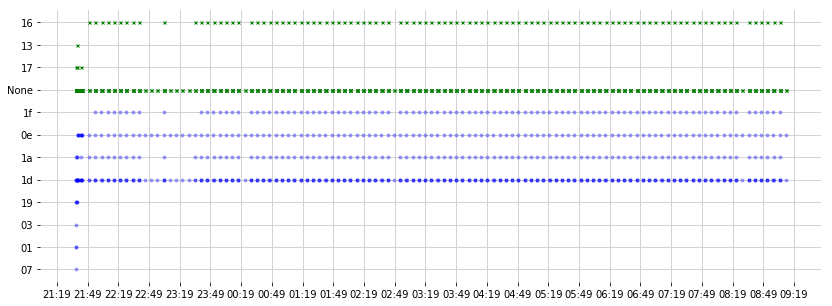

In [129]:
fig, ax = plt.subplots(figsize=(14,5))
ax.grid(color='lightgray', linestyle='-', linewidth=1)
set_time_format = DateFormatter('%H:%M')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(set_time_format)
cmap = plt.get_cmap("tab20c")

# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='17':
            cols.append(1)
        elif l=='16':
            cols.append(2)
        elif l=='13':
            cols.append(3)
        else:
            cols.append(4)
    return cols
# Create the colors list using the function above
color_map=pltcolor(df['extra_command'])

ax.plot(df['time'],df['command'], marker='o', linestyle='None', alpha=0.3,c='b', markersize=3)
ax.plot(df['time'],df['extra_command'], marker='x', linestyle='None',c='g', markersize=3)
# Set x-axis range
#xmin = df.iloc[0]['time']
#xmax = df.iloc[-1]['time']
#ax.set_xlim(xmin, xmax)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

##### 